# CA1 - Boxplot to analyse mean resale price by flat type using HDB dataset

In [1]:
# import necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter # Format the y-axis to display normal values


In [2]:
# load csv file and create dataset

filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/MedianResalePricesforRegisteredApplicationsbyTownandFlatType.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('quarter', 'U50'), ('town', 'U50'), ('flat_type', 'U50'), ('price', 'i8')], 
                     delimiter=',',
                     missing_values=['na', '-', 'NA'], filling_values=0)
print(data[:10])
print(data.dtype)
print(data.shape)

[('2007-Q2', 'Ang Mo Kio', '1-room',      0)
 ('2007-Q2', 'Ang Mo Kio', '2-room',      0)
 ('2007-Q2', 'Ang Mo Kio', '3-room', 172000)
 ('2007-Q2', 'Ang Mo Kio', '4-room', 260000)
 ('2007-Q2', 'Ang Mo Kio', '5-room', 372000)
 ('2007-Q2', 'Ang Mo Kio', 'Executive',      0)
 ('2007-Q2', 'Bedok', '1-room',      0)
 ('2007-Q2', 'Bedok', '2-room',      0)
 ('2007-Q2', 'Bedok', '3-room', 172000)
 ('2007-Q2', 'Bedok', '4-room', 224500)]
[('quarter', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('price', '<i8')]
(10608,)


In [3]:
# Printout useful information about the datset 
print("*** Useful summary of dataset - Median Resale Prices for Registered Applications by Town and Flat Type ***")
print()
print(f"There are {len(data)} rows and {len(data[0])} columns in this dataset")
print()

print("[The names of the columns are:]")
for col in data.dtype.names:
    print(f"- {col} <class '{data[col].dtype}'> isnumeric: {np.issubdtype(data[col].dtype, np.number)}")
print()

print("[The unique values in each column are:]") 
for col in data.dtype.names:
    unique_values = np.unique(data[col])
    print(f"{len(unique_values)} unique values in {col} column")

*** Useful summary of dataset - Median Resale Prices for Registered Applications by Town and Flat Type ***

There are 10608 rows and 4 columns in this dataset

[The names of the columns are:]
- quarter <class '<U50'> isnumeric: False
- town <class '<U50'> isnumeric: False
- flat_type <class '<U50'> isnumeric: False
- price <class 'int64'> isnumeric: True

[The unique values in each column are:]
68 unique values in quarter column
52 unique values in town column
6 unique values in flat_type column
1291 unique values in price column


In [4]:
# Extract rows containing required keywords only
data_required = data[np.isin(data['flat_type'], 
                                ['1-room', '2-room', 
                                 '3-room', '4-room', '5-room', 'Executive'])]

# Extract Labels and Values
labels = data_required['flat_type']
values = data_required['price']

print(labels)
print(values)

['1-room' '2-room' '3-room' ... '4-room' '5-room' 'Executive']
[     0      0 172000 ... 535000 650000 825000]


In [5]:
# Create a mask to filter out rows with 0
valid_rows = data['price'] != 0

# Apply the mask to filter out the rows
data1 = data[valid_rows]

print(data1[:10])
print(data1.dtype)
print(data1.shape)

[('2007-Q2', 'Ang Mo Kio', '3-room', 172000)
 ('2007-Q2', 'Ang Mo Kio', '4-room', 260000)
 ('2007-Q2', 'Ang Mo Kio', '5-room', 372000)
 ('2007-Q2', 'Bedok', '3-room', 172000)
 ('2007-Q2', 'Bedok', '4-room', 224500)
 ('2007-Q2', 'Bedok', '5-room', 332000)
 ('2007-Q2', 'Bedok', 'Executive', 420000)
 ('2007-Q2', 'Bishan', '3-room', 205000)
 ('2007-Q2', 'Bishan', '4-room', 311500)
 ('2007-Q2', 'Bishan', '5-room', 400000)]
[('quarter', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('price', '<i8')]
(4883,)


In [6]:
#Extract and Sort Labels
labels = list(set(data1['flat_type']))
labels.sort()
print("labels: ", labels)
print()

#Create Levels Array
levels = np.arange(0,len(labels))
print("levels:", levels)
print()

#Extract Flat Type and Price Columns
levels_values = data1[['flat_type','price']]
print("levels_values: ", levels_values)
print()

#Extract Price Values
values = levels_values['price']
print("values: ", values)

labels:  ['2-room', '3-room', '4-room', '5-room', 'Executive']

levels: [0 1 2 3 4]

levels_values:  [('3-room', 172000) ('4-room', 260000) ('5-room', 372000) ...
 ('4-room', 535000) ('5-room', 650000) ('Executive', 825000)]

values:  [172000 260000 372000 ... 535000 650000 825000]


In [7]:
# check for 1-room data. (there is no 1-room data!)
onerm_levels_values = data1[data1['flat_type'] == '1-room'][['flat_type', 'price']]
print("1-room levels_values: ", onerm_levels_values)
print()
onerm_levels_values.shape

1-room levels_values:  []



(0,)

In [8]:
# check for 2-room data
tworm_levels_values = data1[data1['flat_type'] == '2-room'][['flat_type', 'price']]
print("2-room levels_values: ", tworm_levels_values)
print()
tworm_levels_values.shape

2-room levels_values:  [('2-room', 136000) ('2-room', 205500) ('2-room', 245500)
 ('2-room', 317500) ('2-room', 327500) ('2-room', 330000)
 ('2-room', 325000) ('2-room', 315000) ('2-room', 340000)
 ('2-room', 343000) ('2-room', 327500) ('2-room', 331000)
 ('2-room', 350000) ('2-room', 319000) ('2-room', 342900)
 ('2-room', 350000) ('2-room', 341500) ('2-room', 330000)]



(18,)

In [9]:
# Extract prices in each Specific Flat Types
values_2rm = values[levels_values['flat_type'] == '2-room']
values_3rm = values[levels_values['flat_type'] == '3-room']
values_4rm = values[levels_values['flat_type'] == '4-room']
values_5rm = values[levels_values['flat_type'] == '5-room']
values_Exec = values[levels_values['flat_type'] == 'Executive']


In [10]:
# Combine them in a list
values_combined =[values_2rm, values_3rm, values_4rm, values_5rm, values_Exec]
print(len(values_combined))
values_combined

5


[array([136000, 205500, 245500, 317500, 327500, 330000, 325000, 315000,
        340000, 343000, 327500, 331000, 350000, 319000, 342900, 350000,
        341500, 330000], dtype=int64),
 array([172000, 172000, 205000, ..., 365000, 393000, 403400], dtype=int64),
 array([260000, 224500, 311500, ..., 834000, 512000, 535000], dtype=int64),
 array([372000, 332000, 400000, ..., 870000, 615000, 650000], dtype=int64),
 array([ 420000,  475000,  370800,  344000,  349000,  361500,  408000,
         312000,  362000,  334000,  339500,  389000,  399000,  445000,
         350000,  331500,  437000,  380000,  393000,  372000,  406000,
         306000,  420000,  352000,  346000,  415000,  432000,  362500,
         355000,  431800,  380000,  416000,  360000,  455000,  421300,
         446000,  380200,  414000,  434000,  362500,  470000,  429000,
         466500,  395500,  590000,  457500,  420000,  415000,  460000,
         550000,  382000,  470000,  405000,  448000,  467000,  486000,
         400000,  372

In [11]:
values_Exec.shape

(647,)

max_Flier: 245505.0, 245500.0
max_Flier: 500005.0, 500000.0
max_Flier: 972505.0, 972500.0
max_Flier: 959005.0, 959000.0
max_Flier: 1045005.0, 1045000.0

Total number of outliers in 2-room: 3
Total number of outliers in 3-room: 9
Total number of outliers in 4-room: 72
Total number of outliers in 5-room: 23
Total number of outliers in Executive: 4


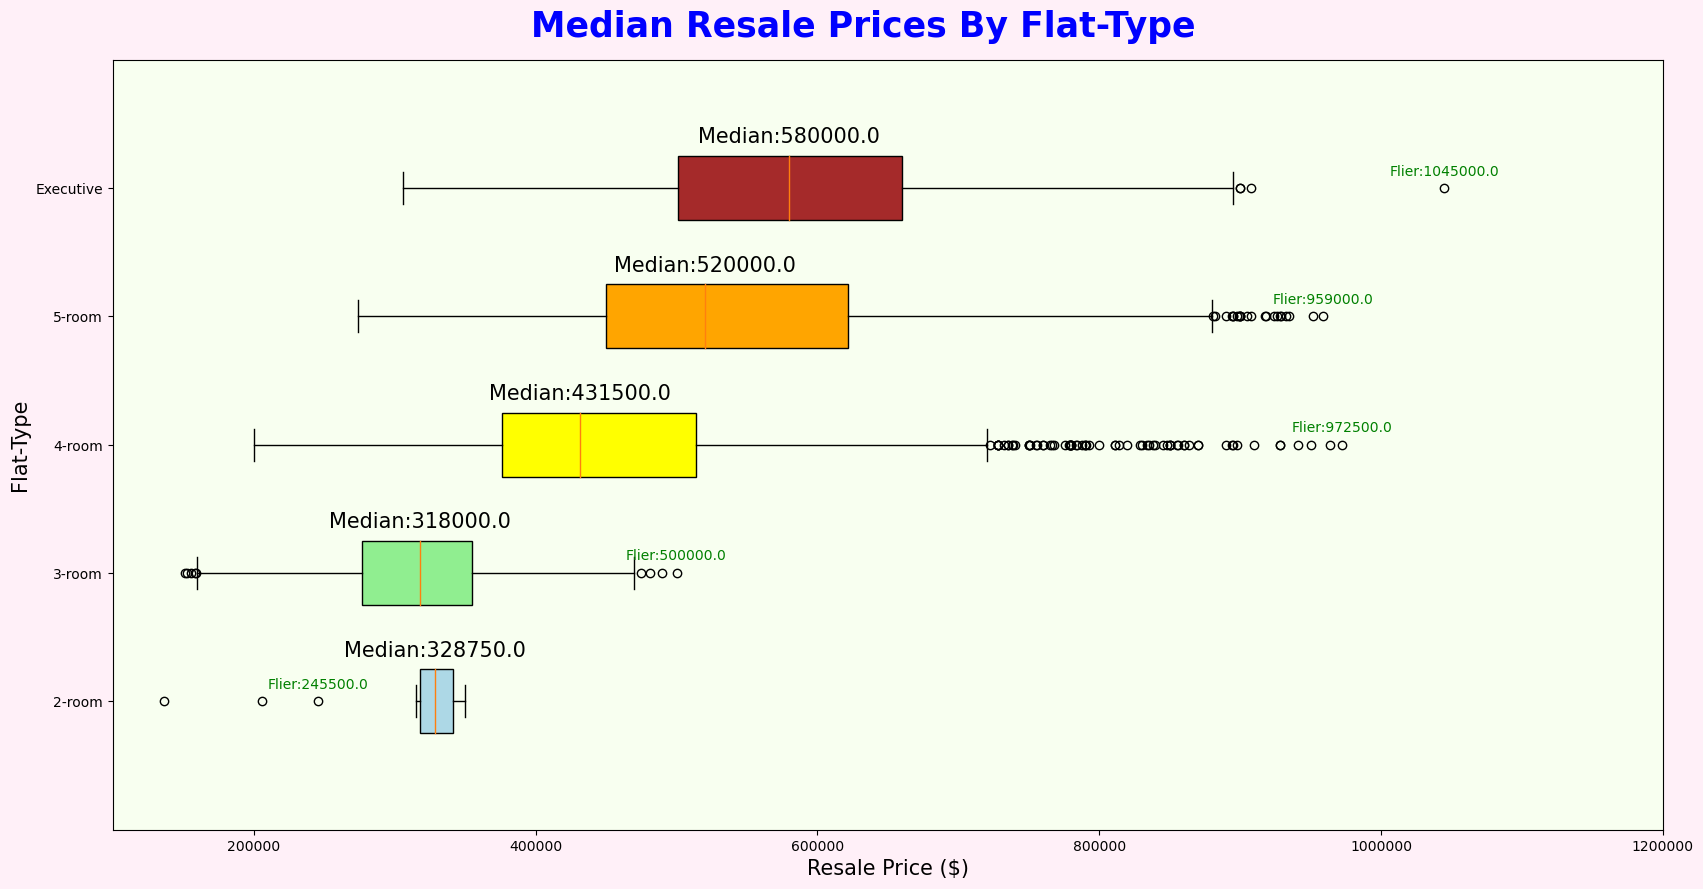

In [12]:
# Create boxplot
fig, ax = plt.subplots(figsize=(20, 10))

# Set title and labels
fig.suptitle('Median Resale Prices By Flat-Type', fontsize=25, fontweight='bold', color='blue', y=0.93)
ax.set_xlabel('Resale Price ($)', fontsize=15)
ax.set_ylabel('Flat-Type', fontsize=15)

# Set background color for the axes and figure of the chart
ax.set_facecolor('#f8fff0') 
fig.patch.set_facecolor('#fff0f8')  

# Create boxplot
bplot = plt.boxplot(values_combined, labels=labels, patch_artist=True, vert=False)

# Format the x-axis to display normal values
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')

# Add color to boxes
colors = ['lightblue', 'lightgreen', 'yellow', 'orange', 'brown']
patchcolor = list(zip(bplot['boxes'], colors))
for patch, color in patchcolor:
    patch.set_facecolor(color)

# Add median to plot
for line in bplot['medians']:
    # Get position data for median line
    x, y = line.get_xydata()[1]  # Top of median line
    # Overlay median value
    plt.text(x, y + 0.1, 'Median:{:.1f}'.format(x), horizontalalignment='center', fontsize=15)  # Draw above, centered

# Add max outliers to plot and count them
outlier_counts = {label: 0 for label in labels}
for i, line in enumerate(bplot['fliers']):
    ndarray = line.get_xydata()
    if len(ndarray) > 0:
        outlier_counts[labels[i]] = len(ndarray)
        max_flier = ndarray[:, 0].max()
        max_flier_index = ndarray[:, 0].argmax()
        x = ndarray[max_flier_index, 0] + 5  # Where to plot the flier text in x position
        y = ndarray[max_flier_index, 1] + 0.1  # Where to plot the flier text in y position
        print(f"max_Flier: {x}, {max_flier}")
        plt.text(x, y, 'Flier:{:.1f}'.format(max_flier), horizontalalignment='center', fontsize=10, color='green')

print()
        
# Print the total numbers of outliers in each category
for label, count in outlier_counts.items():
    print(f"Total number of outliers in {label}: {count}")

# Setting x-axis and y-axis limit for best visualisation 
plt.xlim(100000, 1200000)
plt.ylim(0, len(labels) + 1)

# Save the plot to a file
plt.savefig('Boxplot - Median Resale Price By Flat-Type.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
